In [8]:
import tweepy
import pandas as pd
import pickle

# Primera parte
Descarga de los datos

In [1]:
APP_KEY3="XXXXXXXXXXXXXXXXXXX"
APP_SECRET3="XXXXXXXXXXXXXXXXXXX"
OAUTH_TOKEN3="XXXXXXXXXXXXXXXXXXX"
OAUTH_TOKEN_SECRET3="XXXXXXXXXXXXXXXXXXX"

In [4]:
auth = tweepy.OAuthHandler(APP_KEY3, APP_SECRET3)
auth.set_access_token(OAUTH_TOKEN3, OAUTH_TOKEN_SECRET3)
api3 = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [4]:
f="./bases/informacion_politicos_V2.xlsx"
datos= pd.read_excel(f)

In [11]:
datos.columns


Index(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location',
       'description', 'url', 'entities', 'protected', 'followers_count',
       'friends_count', 'listed_count', 'created_at', 'favourites_count',
       'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count',
       'lang', 'status', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_banner_url', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'follow_request_sent', 'notifications', 'translator_type',
       'withheld_in_countries'],
      dtype='object')

In [5]:
datos=datos.sort_values("followers_count")
datos

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,1048732903,1048732903,Jose Vicente Carreño Castro,joseVcarreno101,Arauca-Colombia,NaN,Representante a la Cámara 2019-2022\npor el Ce...,NaN,{'description': {'urls': []}},False,...,333333,True,True,True,False,False,False,False,none,[]
1,1020347194753405056,1020347194753405056,Gustavo Londoño,_GustavoLondono,"Vichada, Colombia",NaN,Representante a la Cámara del Vichada 2018-202...,https://t.co/e2mpeoFUaI,{'url': {'urls': [{'url': 'https://t.co/e2mpeo...,False,...,333333,True,False,True,False,False,False,False,none,[]
2,4265413587,4265413587,John Jairo Bermúdez Garcés,JohnBermudezG,"Bello, Colombia",NaN,Representante a la Cámara por Antioquia. Parti...,https://t.co/pxO1TJa8EG,{'url': {'urls': [{'url': 'https://t.co/pxO1TJ...,False,...,000000,False,True,False,False,False,False,False,none,[]
3,250295100,250295100,Héctor Ángel Ortiz Núñez,Hangelortizn,"Boyacá, Colombia",NaN,Economista. Especialista en finanzas y contrat...,NaN,{'description': {'urls': []}},False,...,000000,True,False,False,False,False,False,False,none,[]
4,1019705606003977984,1019705606003977984,Yenica Acosta Infante,yenicanosune,"Amazonas, Colombia",NaN,Congresista del Amazonas 2018-2022; al servici...,https://t.co/WiYBZaPKTv,{'url': {'urls': [{'url': 'https://t.co/WiYBZa...,False,...,000000,False,True,False,False,False,False,False,none,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,184590625,184590625,Pacho Santos,PachoSantosC,Colombia,NaN,Pacho Santos. Embajador de Colombia ante Esta...,https://t.co/vR0XS2IdBk,{'url': {'urls': [{'url': 'https://t.co/vR0XS2...,False,...,333333,False,True,False,False,False,False,False,none,[]
93,198984928,198984928,Marta Lucía Ramírez,mluciaramirez,Colombia,NaN,#ElFuturoEsDeTodos y la #Igualdad la mayor her...,NaN,{'description': {'urls': []}},False,...,333333,True,False,False,False,True,False,False,none,[]
94,262814659,262814659,Óscar Iván Zuluaga,OIZuluaga,NaN,NaN,47 millones de motivos para trabajar por #UnaC...,https://t.co/Xr7qLBLIgN,{'url': {'urls': [{'url': 'https://t.co/Xr7qLB...,False,...,333333,False,False,False,False,True,False,False,regular,[]
95,77653794,77653794,Iván Duque 🇨🇴,IvanDuque,NaN,NaN,Presidente de la República de Colombia 🇨🇴 2018...,https://t.co/dgU6HaTLWV,{'url': {'urls': [{'url': 'https://t.co/dgU6Ha...,False,...,333333,True,False,True,False,False,False,False,none,[]


In [6]:
lista=list(datos["screen_name"])
lista[0]

'joseVcarreno101'

In [ ]:

followers={}
exceptions={}
x=0

for i in lista:
    if x%10==0:
        print(x)
        
        
        
        
        
    try:
        
        pages=[]
        for page in tweepy.Cursor(api3.followers_ids, i ).pages():
            pages.extend(page)
        dicc={i:pages}
        followers.update(dicc)
        
        nombre= "./pickle/"+ str(i) +"_followers.pkl"
        
        file = open(nombre,"wb")
        
        pickle.dump(dicc,file)

        file.close()
        
        
        
    except Exception as e:
        print(e,x)
        exc={i:[e,x]}
        exceptions.update(exc)
        next
    x+=1


In [2]:
lista=list(datos["screen_name"])
lista=lista[25:74]
lista

In [17]:
grandes=['OIZuluaga', 'Fruizgomez','PachoSantosC', 'mluciaramirez', 'AlvaroUribeVel', 'IvanDuque']

In [5]:
grandes=["AlvaroUribeVel"]

In [5]:
10%10

0

In [ ]:
x=0
followers={}
exceptions={}
for i in grandes:
    if x%10==0:
        print(x)
        
        
        
        
        
    try:
        
        pages=[]
        for page in tweepy.Cursor(api3.followers_ids, i ).pages():
            pages.extend(page)
            if len(pages)%100000==0:
                print(len(pages))
        dicc={i:pages}
        followers.update(dicc)
        
        nombre= "./pickle/"+ str(i) +"_followers.pkl"
        
        file = open(nombre,"wb")
        
        pickle.dump(dicc,file)

        file.close()
        
        
        
    except Exception as e:
        print(e,x)
        exc={i:[e,x]}
        exceptions.update(exc)
        next
    x+=1


In [24]:
type(followers["AlejoCorralesCD"])

list

In [13]:
import pickle
f = open("./uribistas_seguidores.pkl","wb")
pickle.dump(followers,f)
f.close()

In [74]:
#followers.pop(14802766) ##ERROR EN LA BASE DE DATOS
followers.pop(18468778)
followers.pop(38506942)

len(followers.keys())

66

In [1]:
import pickle

In [3]:
pickle_file = open("uribistas_seguidores.pkl", "rb")

objects = []

while True:

    try:

        objects.append(pickle.load(pickle_file))

    except EOFError:

        break

pickle_file.close()


type(objects)

list

In [18]:
followers=objects[0]

In [17]:
for i in objects[0].keys():
    try:
        politico= datos[datos["user_id"]==i]["nombre"].item()
    except:
        politico=i
    print(politico,":",len(objects[0][i]))

Paola Andrea Holguín Moreno : 196084
Ernesto Macías Tovar : 156816
María Fernanda Cabal Molina : 209832
Ciro Alejandro Ramírez Cortés : 17320
Santiago Valencia González : 27453
Honorio Miguel Henríquez Pinedo : 43462
Gabriel Jaime Velasco Ocampo : 17218
Ruby Helena Chagui Spath : 23226
Alejandro Corrales Escobar : 9701
Paloma Susana Valencia Laserna : 385714
Carlos Felipe Mejía Mejía : 145159
Nicolás Pérez Vásquez : 17379
María del Rosario Guerra de La Espriella : 122870
Fernando Araújo Rumié : 81353
Carlos Manuel Meisel Vergara : 7414
José Obdulio Gaviria : 243669
John Harold Suárez Vargas : 4357
Oscar Darío Pérez Pineda : 10671
14802766 : 9005
César Eugenio Martínez Restrepo : 2638
John Jairo Bermúdez Garces : 1957
Margarita Restrepo : 83981
José Vicente Carreño Castro : 1599
Edward Rodríguez : 25136
Juan Manuel Daza Iguaran : 8593
José Jaime Uscátegui Pastrana : 23791
Gabriel Santos García : 22982
Enrique Cabrales Baquero : 7617
Héctor Ángel Ortiz Núñez : 1992
Juan David Vélez Truji

In [19]:
congresistas=list(followers.keys())[:47]

count_congresitas={}

for congresista in congresistas: 
    seguidores=followers[congresista]
    
    for seguidor in seguidores: 
        if seguidor in count_congresitas.keys():
            count_congresitas[seguidor]+=1
        else:
            count_congresitas[seguidor]=1

        

In [25]:
len(congresistas)*0.3

14.1

In [26]:
contar=0
menor=0
for persona in list(count_congresitas.keys()):
    num=count_congresitas[persona]
    if num>14:
        contar+=1
    else:
        menor+=1
print(contar)        

24662


In [76]:
todos=list(followers.keys())
count_todos={}

for alguien in todos: 
    seguidores=followers[alguien]
    
    for seguidor in seguidores: 
        if seguidor in count_todos.keys():
            count_todos[seguidor]+=1
        else:
            count_todos[seguidor]=1
len(list(count_todos.keys()))

3545649

In [70]:
len(todos)

68

In [112]:
contar=0
menor=0
mas30={}
for persona in list(count_todos.keys()):
    num=count_todos[persona]
    if num>30:
        contar+=1
        mas30.update({persona:[count_todos[persona]]})
    else:
        menor+=1
print(contar)   

11487


In [103]:
x=0
id_=295934325
for i in list(followers.keys()):
    if id_ in followers[i]: 
        x+=1
print(x)
    

38


In [115]:
informacion=[]
j=0
exceptions2={}
for info in  list(mas30.keys()):
    try:
        dic_info=api3.get_user(info)._json
        informacion.append(dic_info)
    
    except Exception as e:
        exceptions2.update({info:[e,j]})
        
    if j%1000==0:
        print(j)
    j+=1
    

0


Rate limit reached. Sleeping for: 87


1000


Rate limit reached. Sleeping for: 47


2000
3000
4000


Rate limit reached. Sleeping for: 70


5000


Rate limit reached. Sleeping for: 110


6000


Rate limit reached. Sleeping for: 88


7000


Rate limit reached. Sleeping for: 116
Rate limit reached. Sleeping for: 143


8000
9000


Rate limit reached. Sleeping for: 71


10000


Rate limit reached. Sleeping for: 103


11000


In [117]:
pd_informacion=pd.DataFrame(informacion)

In [147]:
pd_informacion.to_csv("info_usuarios_30(2).csv", index=False)

In [2]:
pd_informacion=pd.read_csv("info_usuarios_30(2).csv")
len(pd_informacion)

11481

# Segunda Parte 
Exploración de los datos

In [148]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [ ]:
data=list(pd_informacion.sort_values("friends_count", ascending=False)["friends_count"])
# fixed bin size
bins = np.arange(0, 10000, 250) # fixed bin size


plt.figure(figsize=(15,10),facecolor='white',edgecolor='blue')
plt.hist(data, bins=bins, weights=np.ones(len(data)) / len(data))

plt.title('Histograma seguidos (fixed bin size)')
plt.xlabel('seguidos (bin size = 250)')
plt.ylabel('count (%)')


Text(0, 0.5, 'count')

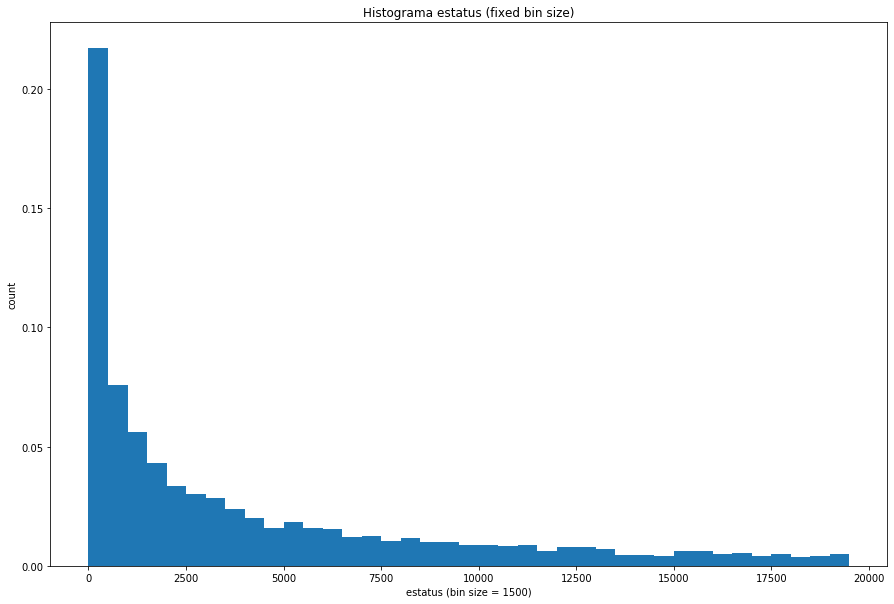

In [255]:
data=list(pd_informacion.sort_values("statuses_count", ascending=False)["statuses_count"])
# fixed bin size
bins = np.arange(0, 20000, 500) # fixed bin size


plt.figure(figsize=(15,10),facecolor='white',edgecolor='blue')
plt.hist(data, bins=bins, weights=np.ones(len(data)) / len(data))


plt.title('Histograma estatus (fixed bin size)')
plt.xlabel('estatus (bin size = 1500)')
plt.ylabel('count')

Text(0, 0.5, 'following_count')

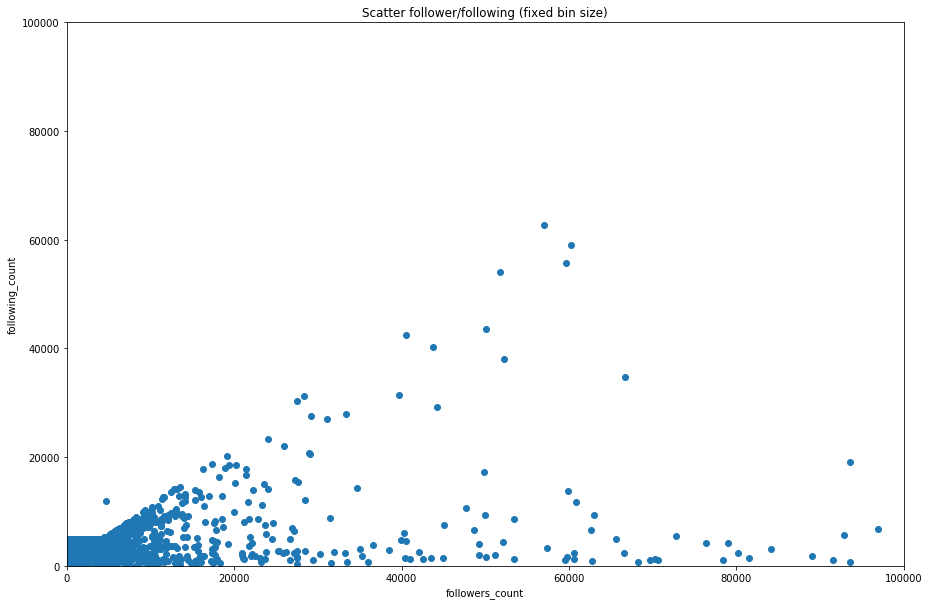

In [282]:
plt.figure(figsize=(15,10),facecolor='white',edgecolor='blue')
plt.scatter(pd_informacion.followers_count, pd_informacion.friends_count)
plt.axis([0, 100000, 0, 100000])
plt.title('Scatter follower/following (fixed bin size)')
plt.xlabel('followers_count')
plt.ylabel('following_count')

Text(0, 0.5, 'following_count')

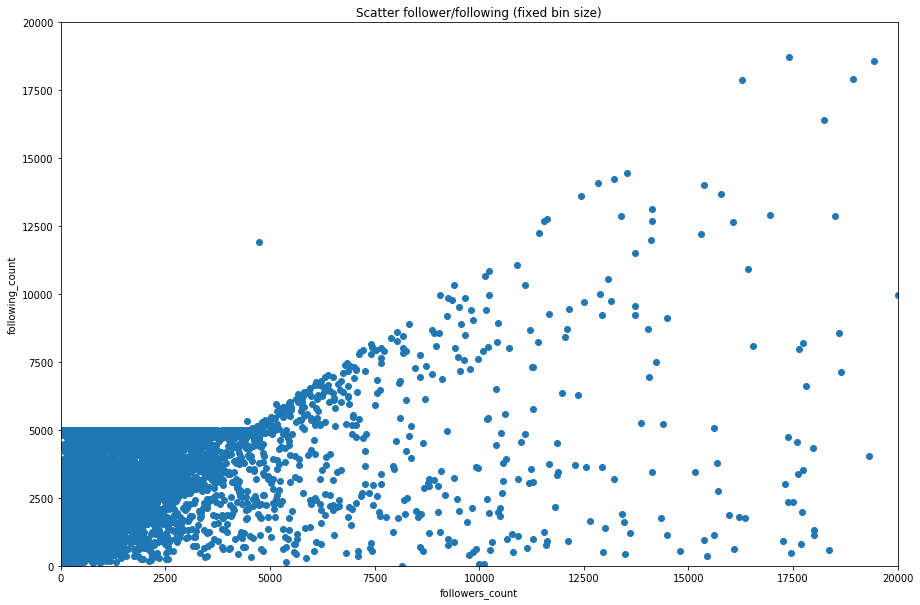

In [283]:
plt.figure(figsize=(15,10),facecolor='white',edgecolor='blue')
plt.scatter(pd_informacion.followers_count, pd_informacion.friends_count)
plt.axis([0, 20000, 0, 20000])
plt.title('Scatter follower/following (fixed bin size)')
plt.xlabel('followers_count')
plt.ylabel('following_count')

In [294]:
list(pd_informacion.sort_values("followers_count", ascending=False)["screen_name"])[101]

'hilandofinotv'

In [405]:
x=0
uri=[]
nuri=[]
uribista=[]
y=0
for i in list(pd_informacion["description"]):
    descr= i
    descr= descr.lower()
    if "antiuribista"  in descr:
        y+=1
        uribista.append(False)
        nuri.append(i)
    elif "anti uribista" in descr:
        y+=1
        uribista.append(False)
        nuri.append(i)
    elif "uribista"  in descr: 
        uri.append(i)
        x+=1
        uribista.append(True)
    elif "patria" in descr:
        uri.append(i)
        x+=1
        uribista.append(True)
    elif "catolic" in descr:
        uri.append(i)
        x+=1
        uribista.append(True)

    elif "católic" in descr:
        uri.append(i)
        x+=1
        uribista.append(True)
    elif "antiomunista"in descr:
        uri.append(i)
        x+=1
        uribista.append(True)
    elif "antimamerto" in descr:
        uri.append(i)
        x+=1
        uribista.append(True)
    elif "derecha" in descr: 
        uri.append(i)
        x+=1
        uribista.append(True)
    else:
        uribista.append(False)
        nuri.append(i)

print(x,y)

2319 13


In [402]:
list(pd_informacion["description"])[370:390]

['',
 '',
 'Político',
 'papá, estudiante de derecho, con muchos sueños y proyectos por hacer realidad; de la mano de Dios lo lograré. De derecha y por la derecha siempre.',
 '',
 '',
 '📚Politólogo.',
 'Hijo,padre,abuelo,soy uribista y con justo desprecio por la guerrilla y paras a la final son lo mismo.',
 'Oficina de Abogado con sede en Rionegro y Medellín. Contacto: 316 529 7551.',
 'dé familia católica también de familia uribista soy dé Medellin  pero vivo en Cali   sólo apoyamos al uribismo y orgulloso de llevar este apellido de uribe',
 'Amor por Colombia. Unidos seremos un mejor País. no Odios, no venganzas. Si a La Paz, No impunidad.',
 '',
 '',
 'Abogado, defensor del Estado de Derecho. Los buenos somos más, pero debemos unirnos.',
 'Empresario Soñador \nAmo 🇨🇴 Colombia',
 '🇨🇴 Le apostamos a la Justicia Digital 🚀\nComprometidos con nuestro país \nIG. @TEOABOGADOS',
 'Uribista y Duquista',
 '¡Mano firme, corazón grande! ❤️🇨🇴',
 'Uribista 100%. Admirador del Gran Colombiano.\nDe

In [380]:
pd_informacion["uribista"] =uribista

In [403]:
uribistas=pd_informacion[pd_informacion["uribista"]==True]
x=0
for i in pd_informacion["followers_count"]:
    if i>=5000:
        x+=1
x

669

Text(0, 0.5, 'following_count')

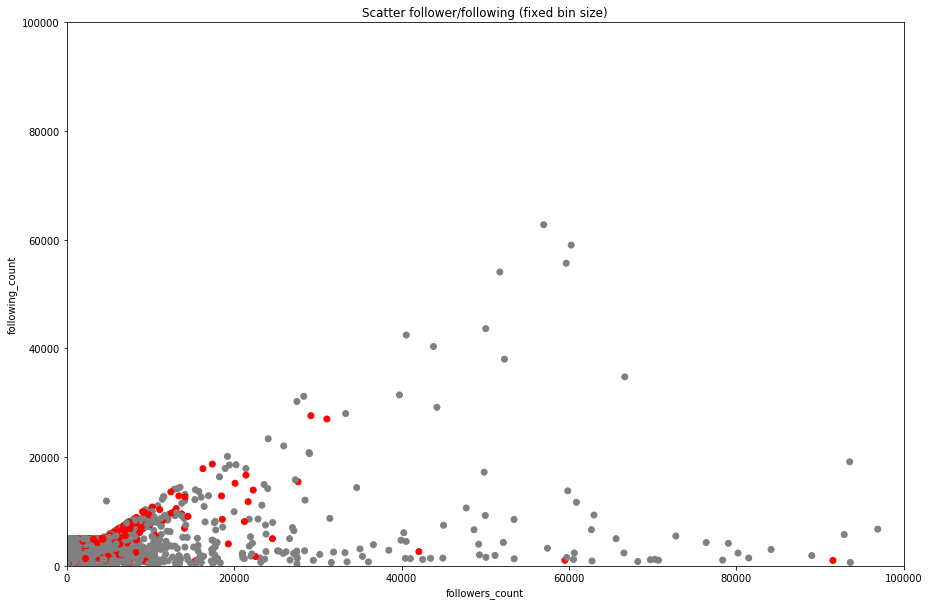

In [384]:
col = np.where(pd_informacion.uribista==True,'red',"grey")
plt.figure(figsize=(15,10),facecolor='white',edgecolor='blue')
plt.scatter(pd_informacion.followers_count, pd_informacion.friends_count, c=col)
plt.axis([0, 100000, 0, 100000])
plt.title('Scatter follower/following (fixed bin size)')
plt.xlabel('followers_count')
plt.ylabel('following_count')

Text(0, 0.5, 'following_count')

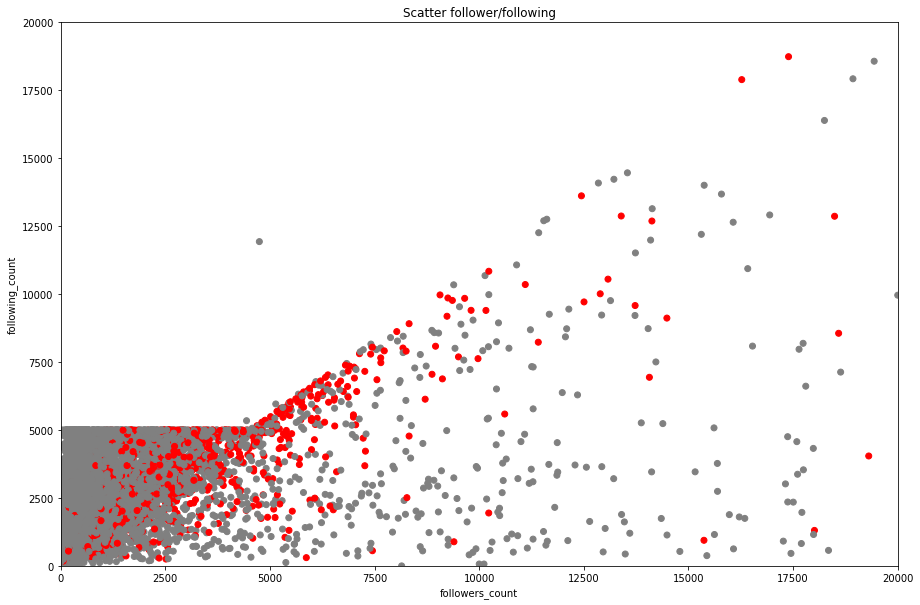

In [395]:
col = np.where(pd_informacion.uribista==True,'red',"grey")
plt.figure(figsize=(15,10),facecolor='white',edgecolor='blue')
plt.scatter(pd_informacion.followers_count, pd_informacion.friends_count, c=col)
plt.axis([0, 20000, 0, 20000])
plt.title('Scatter follower/following')
plt.xlabel('followers_count')
plt.ylabel('following_count')

In [393]:
x=0
for i in informacion: 
    if i["followers_count"]>=1000:
        if i["statuses_count"]>=300:
            x+=1
x

3649